In [13]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('seq_ai4i.csv')

# Display the first 5 rows of the dataframe to understand the data structure
print("Preview of the Dataframe:")
display(df.head())

# Generate descriptive statistics to get an overview of the numerical features
print("\nDescriptive Statistics for Numerical Features:")
display(df.describe())

# Obtain a concise summary of the dataframe to check for non-null counts and data types
print("\nDataframe Information:\n")
display(df.info())


Preview of the Dataframe:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,7271,L54450,L,300.2,310.4,1808,25.8,35,0,0,0,0,0,0
1,861,H30274,H,296.1,306.9,1541,32.6,33,0,0,0,0,0,0
2,5391,H34804,H,302.8,312.3,1483,47.2,223,0,0,0,0,0,0
3,5192,L52371,L,304.0,313.2,1416,46.0,128,0,0,0,0,0,0
4,5735,L52914,L,302.3,311.8,1369,56.2,208,1,0,0,0,1,0



Descriptive Statistics for Numerical Features:


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,5007.987665,300.006852,310.008881,1538.729810,39.998255,107.967895,0.033510,0.004650,0.011205,0.009430,0.009605,0.001825
std,2887.568128,1.998825,1.482515,179.655327,9.986544,63.536386,0.179965,0.068032,0.105259,0.096649,0.097534,0.042681
min,1.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2510.000000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5013.000000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7509.000000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10000.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Dataframe Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   UDI                      200000 non-null  int64  
 1   Product ID               200000 non-null  object 
 2   Type                     200000 non-null  object 
 3   Air temperature [K]      200000 non-null  float64
 4   Process temperature [K]  200000 non-null  float64
 5   Rotational speed [rpm]   200000 non-null  int64  
 6   Torque [Nm]              200000 non-null  float64
 7   Tool wear [min]          200000 non-null  int64  
 8   Machine failure          200000 non-null  int64  
 9   TWF                      200000 non-null  int64  
 10  HDF                      200000 non-null  int64  
 11  PWF                      200000 non-null  int64  
 12  OSF                      200000 non-null  int64  
 13  RNF                      200000 no

None

**Following step is to resolve possibly wrong data, or problematis inputs like no specific failure but total machine failure at the same time**

In [15]:
# Identifying rows where 'machine failure' is 1 but all failure modes are 0
condition_1 = (
    (df['Machine failure'] == 1) & 
    (df['TWF'] == 0) & 
    (df['HDF'] == 0) & 
    (df['PWF'] == 0) & 
    (df['OSF'] == 0) & 
    (df['RNF'] == 0)
)

# Identifying rows where 'machine failure' is 0 but at least one failure mode is 1
condition_2 = (
    (df['Machine failure'] == 0) & 
    ((df['TWF'] == 1) | 
     (df['HDF'] == 1) | 
     (df['PWF'] == 1) | 
     (df['OSF'] == 1) | 
     (df['RNF'] == 1))
)

# Before updating the 'Machine failure' status, we should review these cases.
print(f"Found {len(df[condition_1])} instances of 'Machine failure' with no individual modes triggered.")
print(f"Found {len(df[condition_2])} instances of individual failure modes triggered without 'Machine failure'.")

# For rows where 'machine failure' is 1 but all failure modes are 0, set 'Machine failure' to 0
df.loc[condition_1, 'Machine failure'] = 0

# For rows where 'machine failure' is 0 but at least one failure mode is 1, set 'Machine failure' to 1
df.loc[condition_2, 'Machine failure'] = 1

Found 197 instances of 'Machine failure' with no individual modes triggered.
Found 349 instances of individual failure modes triggered without 'Machine failure'.


*Visualization to understand relative frequencies of failures and possible bias in later predictions*

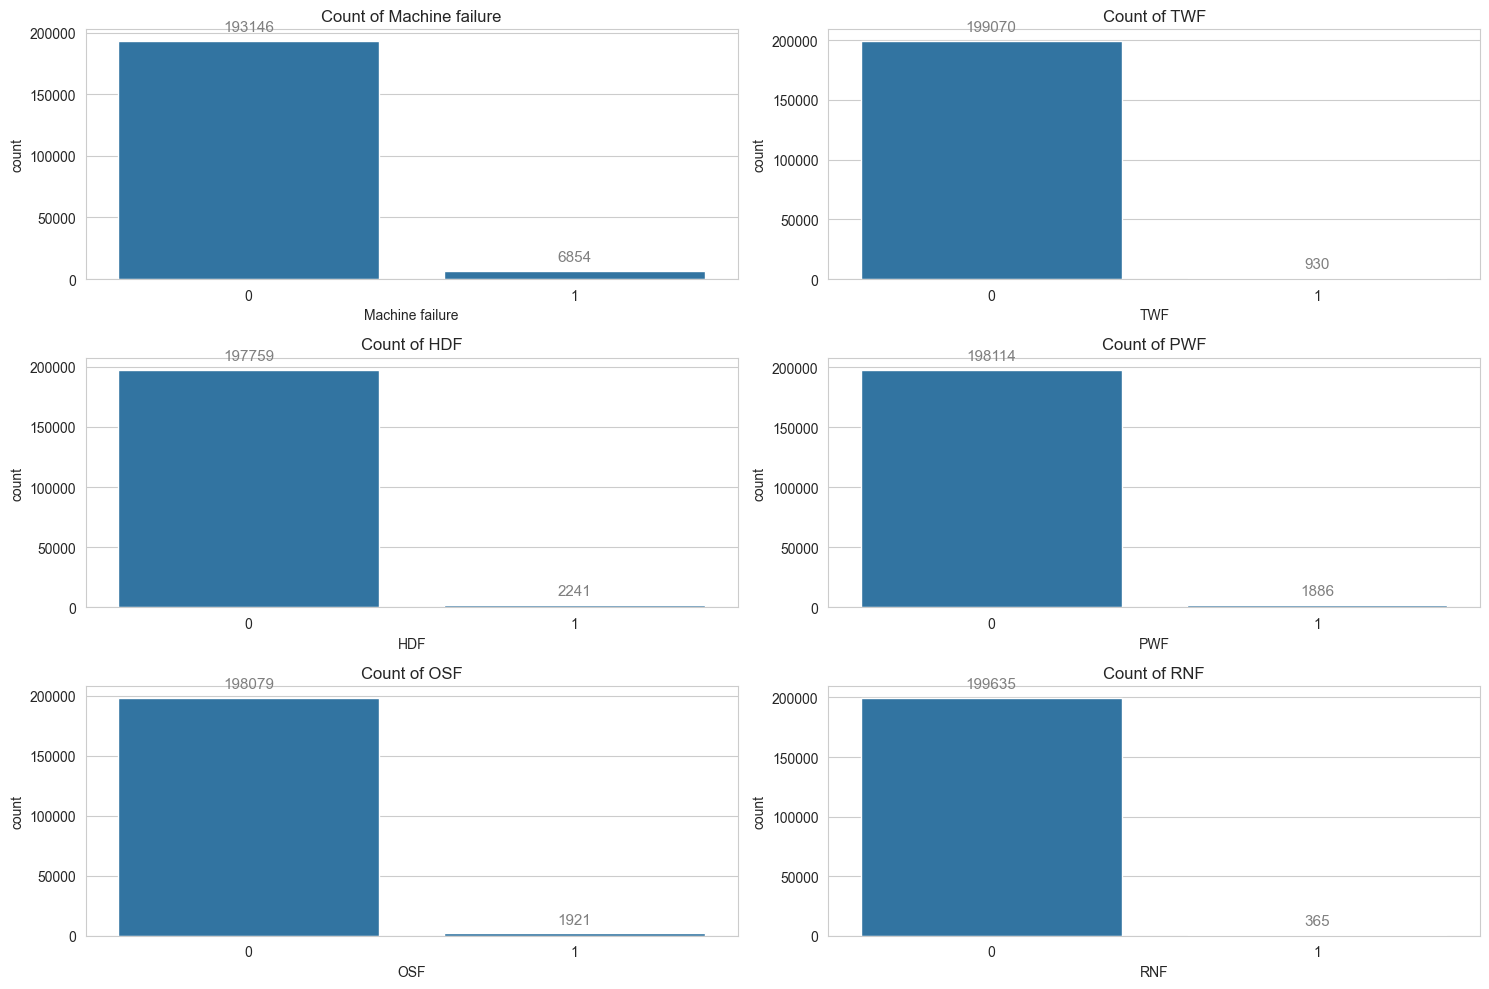

In [16]:
sns.set_style("whitegrid")

# Prepare the dataset for plotting
failure_modes = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Plotting the bar charts for each failure mode
plt.figure(figsize=(15, 10))
for i, mode in enumerate(failure_modes, 1):
    plt.subplot(3, 2, i)
    ax = sns.countplot(x=mode, data=df)
    ax.set_title(f'Count of {mode}')
    # Annotate the count above the bars for better readability
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

*Visualize machine quality distribution*

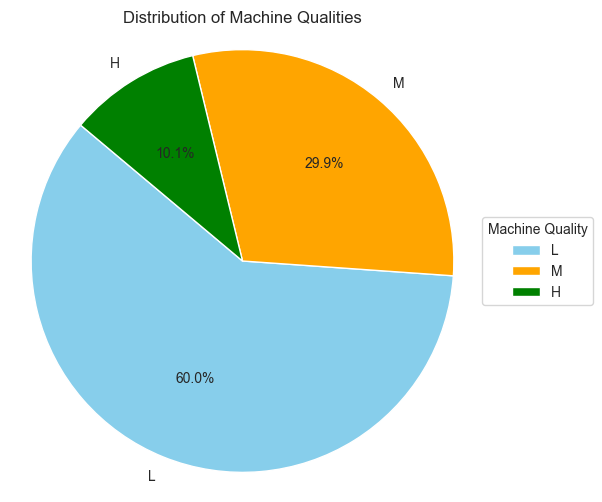

In [17]:
# Extracting the unique machine qualities and their counts
machine_qualities = df['Type'].value_counts()
labels = machine_qualities.index
counts = machine_qualities.values

# Setting up the color palette for better visual distinction
colors = ['skyblue', 'orange', 'green']

# Creating the pie chart with more descriptive labels and a legend
plt.figure(figsize=(6, 6))  # Adjusting figure size for better readability
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Machine Qualities')
plt.legend(labels, title="Machine Quality", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Failure analysis by machine quality, to test robustness of data

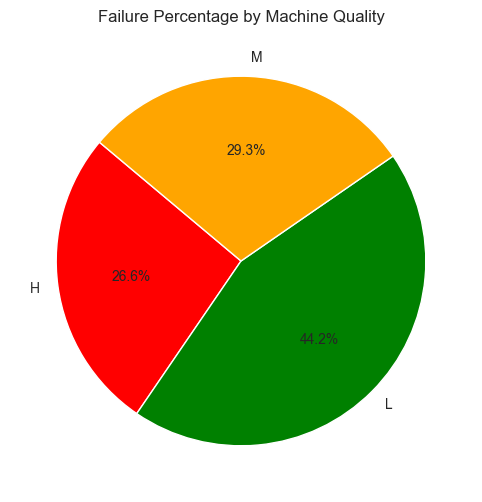

In [18]:
# Group the dataframe by 'Type' and calculate the failure counts for each type
failure_counts = df.groupby('Type')['Machine failure'].sum().reset_index()
failure_counts.columns = ['Machine Quality', 'Failure Count']

# Calculate the total counts for each machine quality
value_counts = df['Type'].value_counts().reset_index()
value_counts.columns = ['Machine Quality', 'Total Count']

# Merge the two dataframes to get a complete picture of failures vs total counts
failure_counts = failure_counts.merge(value_counts, on='Machine Quality')
failure_counts['Failure Percentage'] = (failure_counts['Failure Count'] / failure_counts['Total Count']) * 100

# Define colors for the pie chart
colors = {'L': 'green', 'M': 'orange', 'H': 'red'}

# Plotting the pie chart using the failure percentages for each machine quality
plt.figure(figsize=(10, 6))
plt.pie(failure_counts['Failure Percentage'], labels=failure_counts['Machine Quality'], 
        autopct='%1.1f%%', startangle=140, colors=[colors[label] for label in failure_counts['Machine Quality']])
plt.title('Failure Percentage by Machine Quality')
plt.show()

Results are as expected, lower quality machines are responsible for a lot more failure than the other better machines.

**Feature Engineering**

In [19]:
df_with_new_features=df.copy() #making a copy of df

#Adding new columns to the copy of df, these are combinations of the features in the original dataset, with a more direct theoretical effect on failure
df_with_new_features['Temperature difference [k]']= df_with_new_features['Process temperature [K]'] - df_with_new_features['Air temperature [K]']
df_with_new_features['Power [W]'] = df_with_new_features['Torque [Nm]'] * df_with_new_features['Rotational speed [rpm]'] * 0.104719755
df_with_new_features['Strain [minNm]'] = df_with_new_features['Torque [Nm]'] * df_with_new_features['Tool wear [min]']

In [25]:
df_with_new_features.head(10)
df_with_new_features.to_csv("ext_seq_ai4i.csv", index = False)

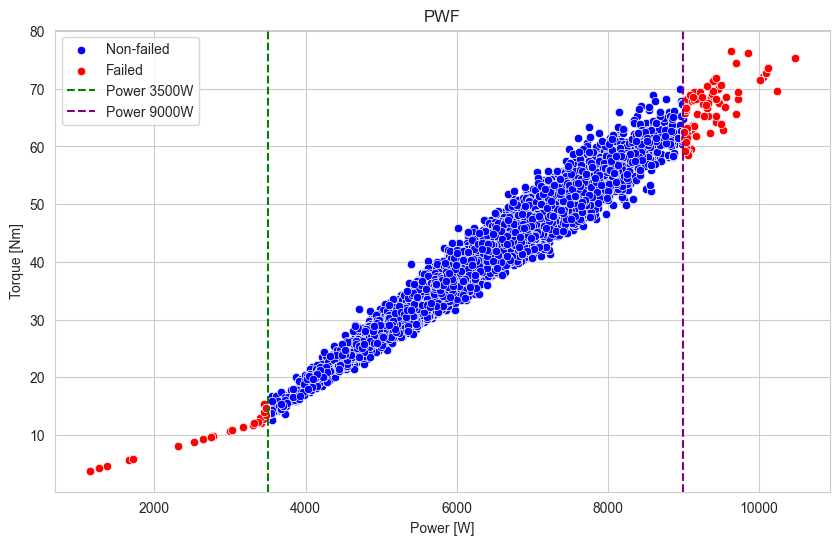

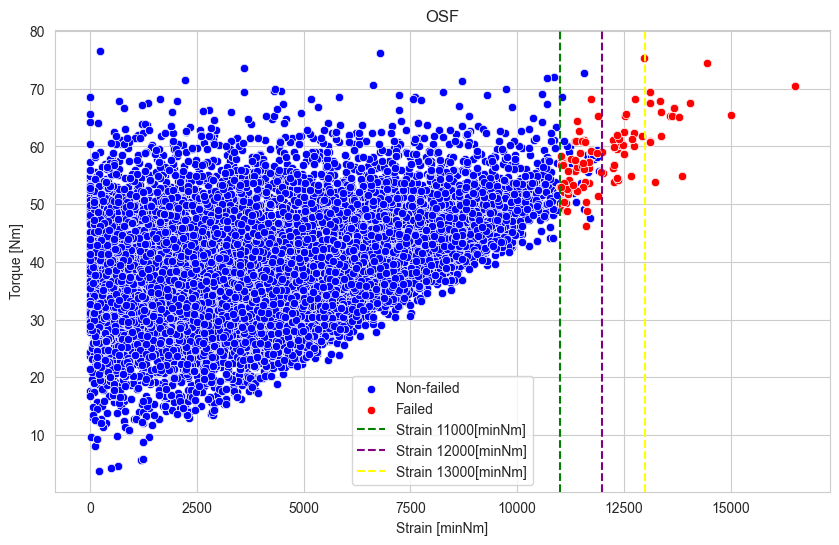

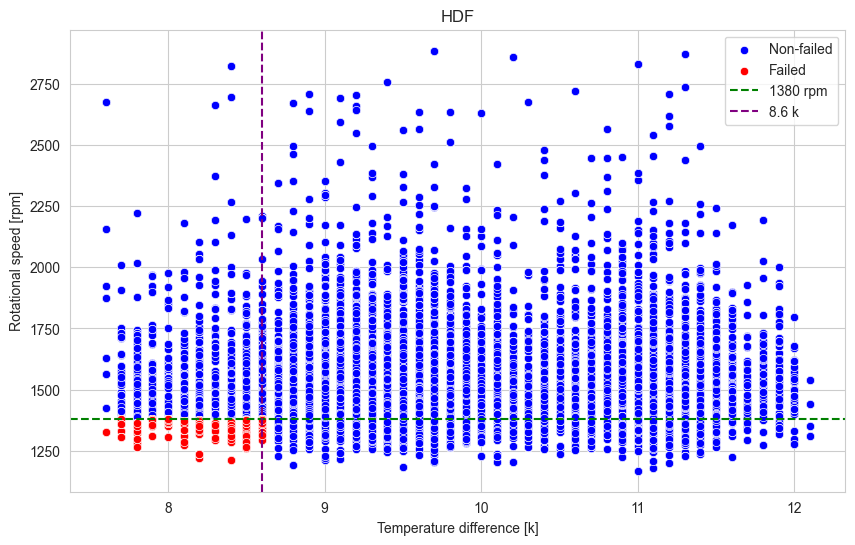

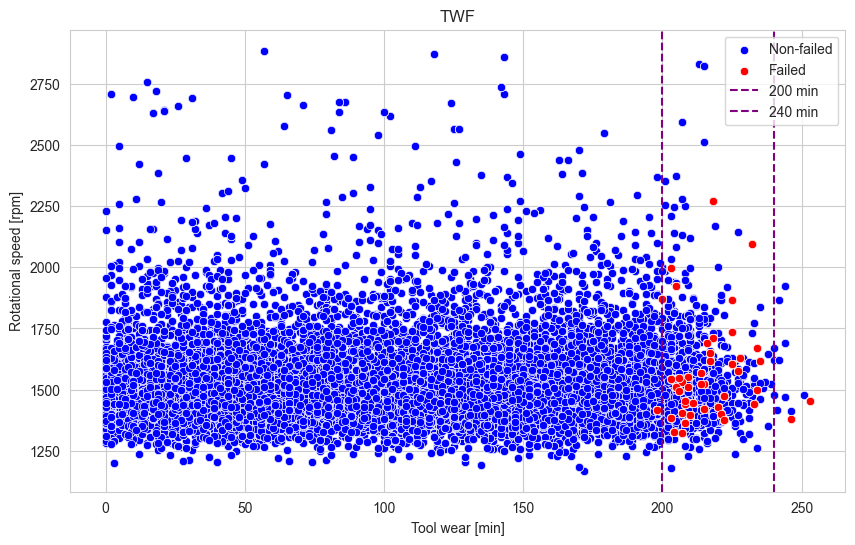

In [21]:
#Looking at the mode of failure and the important features affecting them with the important boundaries

plt.figure(figsize=(10, 6)) # Set the size of the resulting plot

# Plot the data points for non-failed machines based on 'Power [W]' and 'Torque [Nm]'
sns.scatterplot(data=df_with_new_features[df_with_new_features['PWF'] == 0], x='Power [W]', y='Torque [Nm]', color='blue', label='Non-failed')
# Plot the data points for failed machines based on 'Power [W]' and 'Torque [Nm]'
sns.scatterplot(data=df_with_new_features[df_with_new_features['PWF'] == 1], x='Power [W]', y='Torque [Nm]', color='red', label='Failed')
# Add a vertical dashed line at Power 3500W for reference (this comes from data descrption)
plt.axvline(3500, color='green', linestyle='--', label='Power 3500W')
# Add a vertical dashed line at Power 9000W for reference (this comes from data descrption)
plt.axvline(9000, color='purple', linestyle='--', label='Power 9000W')
plt.xlabel('Power [W]')
plt.ylabel('Torque [Nm]')
plt.title('PWF')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_with_new_features[df_with_new_features['OSF'] == 0], x='Strain [minNm]', y='Torque [Nm]', color='blue', label='Non-failed')
sns.scatterplot(data=df_with_new_features[df_with_new_features['OSF'] == 1], x='Strain [minNm]', y='Torque [Nm]', color='red', label='Failed')
plt.axvline(11000, color='green', linestyle='--', label='Strain 11000[minNm]')
plt.axvline(12000, color='purple', linestyle='--', label='Strain 12000[minNm]')
plt.axvline(13000, color='yellow', linestyle='--', label='Strain 13000[minNm]')
plt.xlabel('Strain [minNm]')
plt.ylabel('Torque [Nm]')
plt.title('OSF')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_with_new_features[df_with_new_features['HDF'] == 0], x='Temperature difference [k]', y='Rotational speed [rpm]', color='blue', label='Non-failed')
sns.scatterplot(data=df_with_new_features[df_with_new_features['HDF'] == 1], x='Temperature difference [k]', y='Rotational speed [rpm]', color='red', label='Failed')
plt.axhline(1380, color='green', linestyle='--', label='1380 rpm')
plt.axvline(8.6, color='purple', linestyle='--', label='8.6 k')
plt.xlabel('Temperature difference [k]')
plt.ylabel('Rotational speed [rpm]')
plt.title('HDF')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_with_new_features[df_with_new_features['TWF'] == 0], x='Tool wear [min]', y='Rotational speed [rpm]', color='blue', label='Non-failed')
sns.scatterplot(data=df_with_new_features[df_with_new_features['TWF'] == 1], x='Tool wear [min]', y='Rotational speed [rpm]', color='red', label='Failed')
plt.axvline(200, color='purple', linestyle='--', label='200 min')
plt.axvline(240, color='purple', linestyle='--', label='240 min')
plt.xlabel('Tool wear [min]')
plt.ylabel('Rotational speed [rpm]')
plt.title('TWF')
plt.legend()
plt.show()

**OSF**

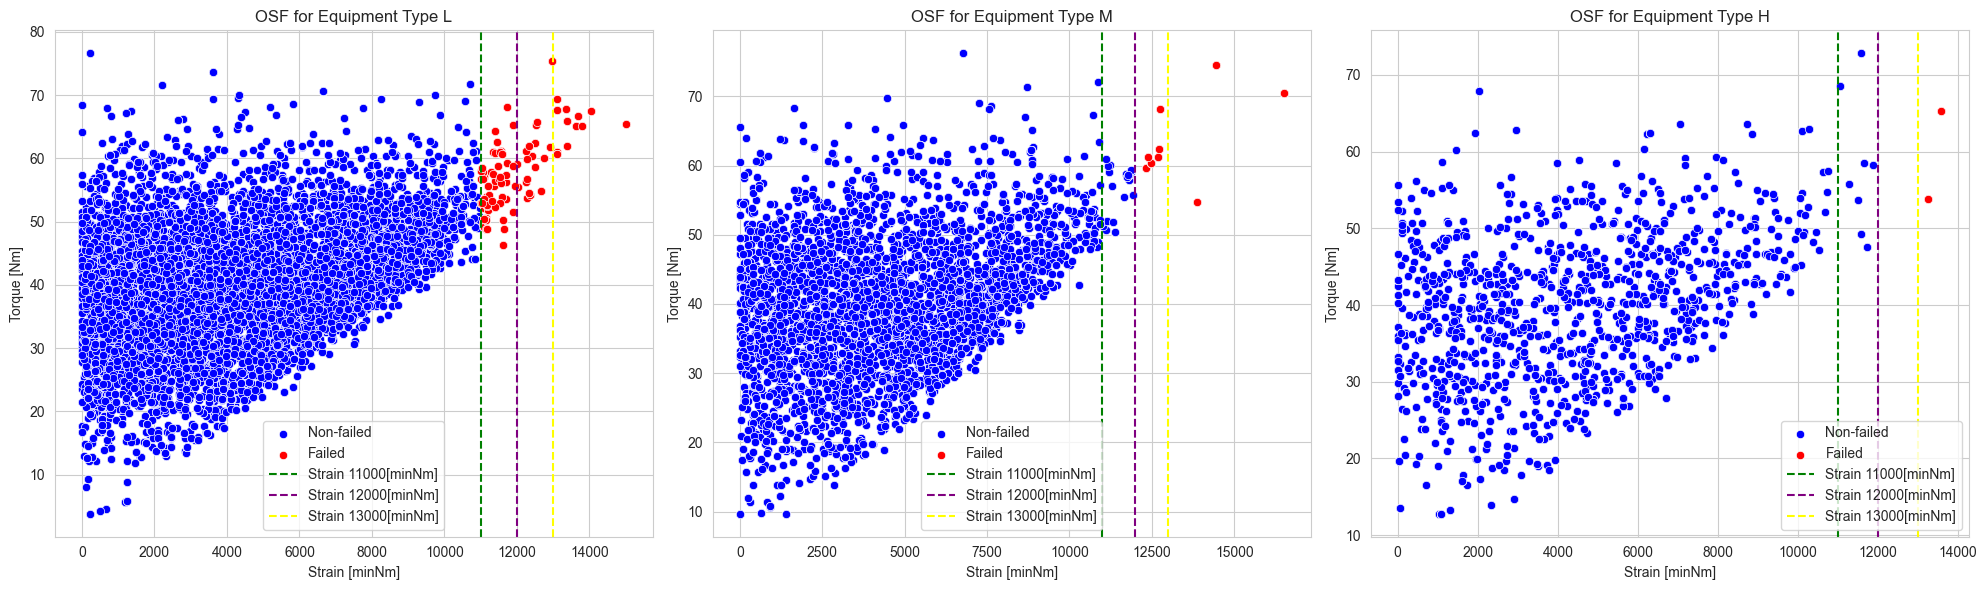

In [22]:
# Diving more into OSF mode of failure, looking into OSF mode of failure for each type of machines (L, M and H):

# Define the different types of equipment to plot
types = ["L", "M", "H"]
# Create subplots with 1 row and 3 columns and specify the size of the entire figure
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Loop over each equipment type to plot its data
for i, equipment_type in enumerate(types):
    filtered_data = df_with_new_features[df_with_new_features['Type'] == equipment_type] # Filter the data based on the current equipment type
    sns.scatterplot(data=filtered_data[filtered_data['OSF'] == 0], x='Strain [minNm]', y='Torque [Nm]', color='blue', label='Non-failed', ax=axes[i]) # Plot data points for non-failed machines of the current equipment type using blue color
    sns.scatterplot(data=filtered_data[filtered_data['OSF'] == 1], x='Strain [minNm]', y='Torque [Nm]', color='red', label='Failed', ax=axes[i]) # Plot data points for failed machines of the current equipment type using red color
    
    # Draw vertical reference lines at specified strain values on each subplot
    axes[i].axvline(11000, color='green', linestyle='--', label='Strain 11000[minNm]')
    axes[i].axvline(12000, color='purple', linestyle='--', label='Strain 12000[minNm]')
    axes[i].axvline(13000, color='yellow', linestyle='--', label='Strain 13000[minNm]')
    
    # Set x and y labels for each subplot
    axes[i].set_xlabel('Strain [minNm]')
    axes[i].set_ylabel('Torque [Nm]')
    axes[i].set_title(f'OSF for Equipment Type {equipment_type}') # Set a title for each subplot based on the equipment type

    axes[i].legend() # Add a legend to each subplot

plt.tight_layout() # Adjust the layout to ensure plots do not overlap
plt.show()

**TWF**

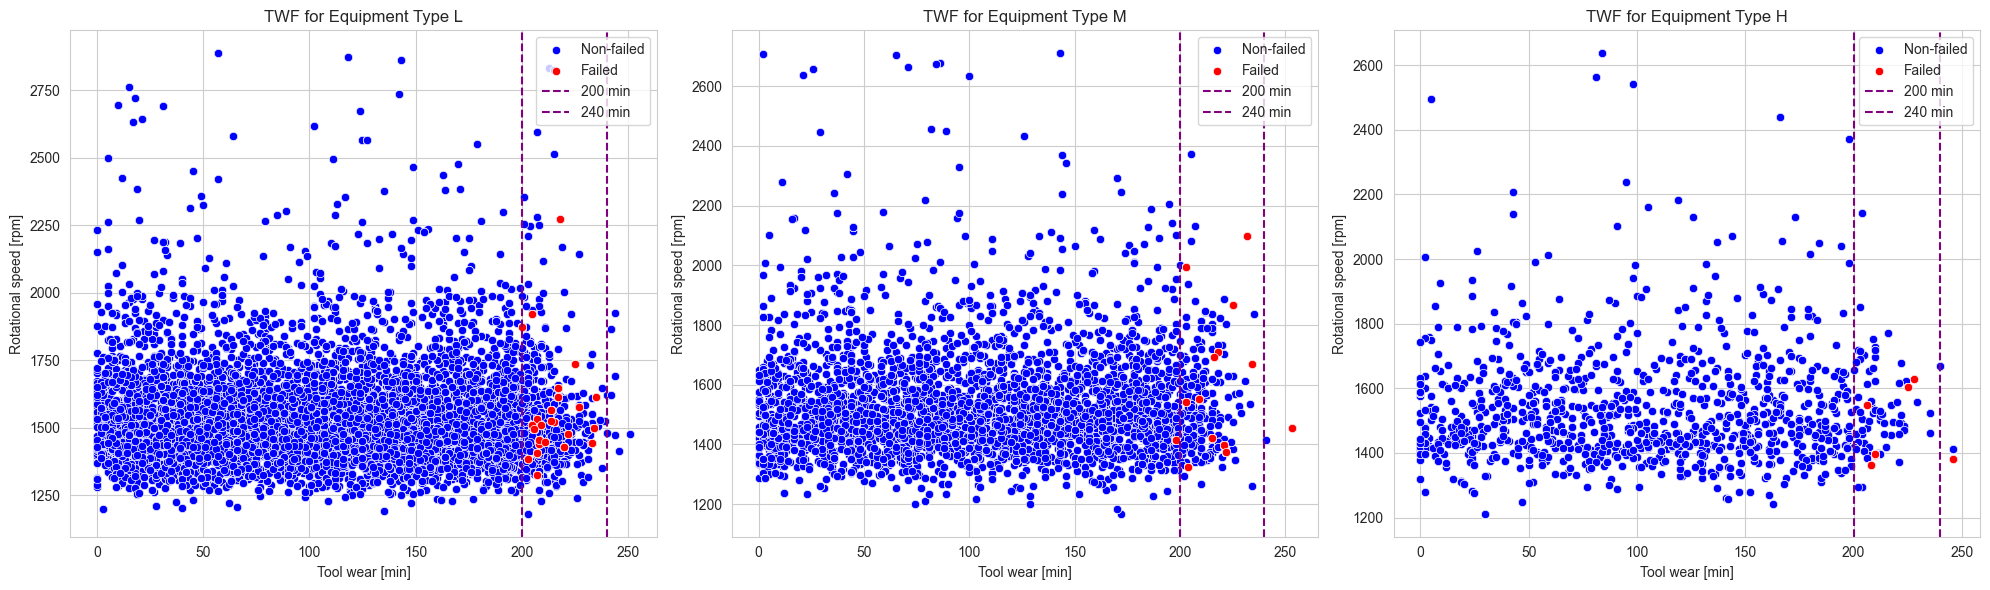

In [23]:
# Diving more into TWF mode of failure, looking into TWF mode of failure for each type of machines (L, M and H):

types = ["L", "M", "H"]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, equipment_type in enumerate(types):
    filtered_data = df_with_new_features[df_with_new_features['Type'] == equipment_type]
    sns.scatterplot(data=filtered_data[filtered_data['TWF'] == 0], x='Tool wear [min]', y='Rotational speed [rpm]', color='blue', label='Non-failed', ax=axes[i])
    sns.scatterplot(data=filtered_data[filtered_data['TWF'] == 1], x='Tool wear [min]', y='Rotational speed [rpm]', color='red', label='Failed', ax=axes[i])
    
    axes[i].axvline(200, color='purple', linestyle='--', label='200 min')
    axes[i].axvline(240, color='purple', linestyle='--', label='240 min')

    axes[i].set_xlabel('Tool wear [min]')
    axes[i].set_ylabel('Rotational speed [rpm]')
    axes[i].set_title(f'TWF for Equipment Type {equipment_type}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [24]:
bin_map = {'L': 0, 'M': 1, 'H':2} #considering quality an ordinal category and mapping both df and df_with_new_features based on this concept
df['Type'] = df['Type'].map(bin_map) 
df_with_new_features['Type'] = df_with_new_features['Type'].map(bin_map)